In [1]:
# make the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Identification of Cointegrated Pairs of Stocks

In [2]:
# read back the pricing data
prices = pd.read_csv('consumer_durable.csv', index_col=['date'])
prices.head(10)

TITAN.NS  HAVELLS.NS   VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
date                                                                        
01-01-2018  852.450012  554.450012  648.950012   270.600006    755.299988   
02-01-2018  845.150024  549.250000  647.400024   277.799988    753.900024   
03-01-2018  856.299988  555.650024  643.599976   280.149994    772.400024   
04-01-2018  892.900024  562.849976  645.700012   282.950012    767.349976   
05-01-2018  909.700012  566.049988  646.349976   279.000000    764.799988   
08-01-2018  926.099976  563.099976  638.650024   273.950012    761.549988   
09-01-2018  932.950012  552.250000  648.599976   276.100006    746.900024   
10-01-2018  917.599976  549.700012  629.299988   270.500000    753.950012   
11-01-2018  906.900024  548.799988  625.849976   272.649994    749.700012   
12-01-2018  903.799988  549.099976  633.950012   272.250000    746.099976   

            KAJARIACER.NS  RAJESHEXPO.NS   RELAXO.NS  BLUESTARCO.NS  
date                                                                 
01-01-2018     725.099976     804.700012  343.424988     821.500000  
02-01-2018     712.950012     816.250000  335.450012     817.799988  
03-01-2018     736.950012     809.750000  343.000000     818.200012  
04-01-2018     743.700012     847.750000  340.200012     815.000000  
05-01-2018     750.849976     820.549988  339.774994     819.750000  
08-01-2018     748.150024     820.349976  336.875000     816.500000  
09-01-2018     753.000000     827.450012  337.274994     804.349976  
10-01-2018     747.599976     827.150024  339.950012     806.500000  
11-01-2018     742.000000     818.299988  337.600006     800.799988  
12-01-2018     739.549988     818.250000  339.024994     789.400024

In [3]:
# train test split 
train_close, test_close = train_test_split(prices, test_size=0.251012, shuffle=False)

In [4]:
# quick view of head and tail of train set
train_close.head(2).append(train_close.tail(2))

TITAN.NS  HAVELLS.NS   VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
date                                                                         
01-01-2018   852.450012  554.450012  648.950012   270.600006    755.299988   
02-01-2018   845.150024  549.250000  647.400024   277.799988    753.900024   
30-12-2020  1552.599976  904.650024  819.799988   368.350006   1581.099976   
31-12-2020  1567.150024  916.150024  825.650024   380.549988   1579.650024   

            KAJARIACER.NS  RAJESHEXPO.NS   RELAXO.NS  BLUESTARCO.NS  
date                                                                 
01-01-2018     725.099976     804.700012  343.424988     821.500000  
02-01-2018     712.950012     816.250000  335.450012     817.799988  
30-12-2020     689.650024     486.799988  801.299988     801.549988  
31-12-2020     703.599976     490.549988  809.700012     801.099976

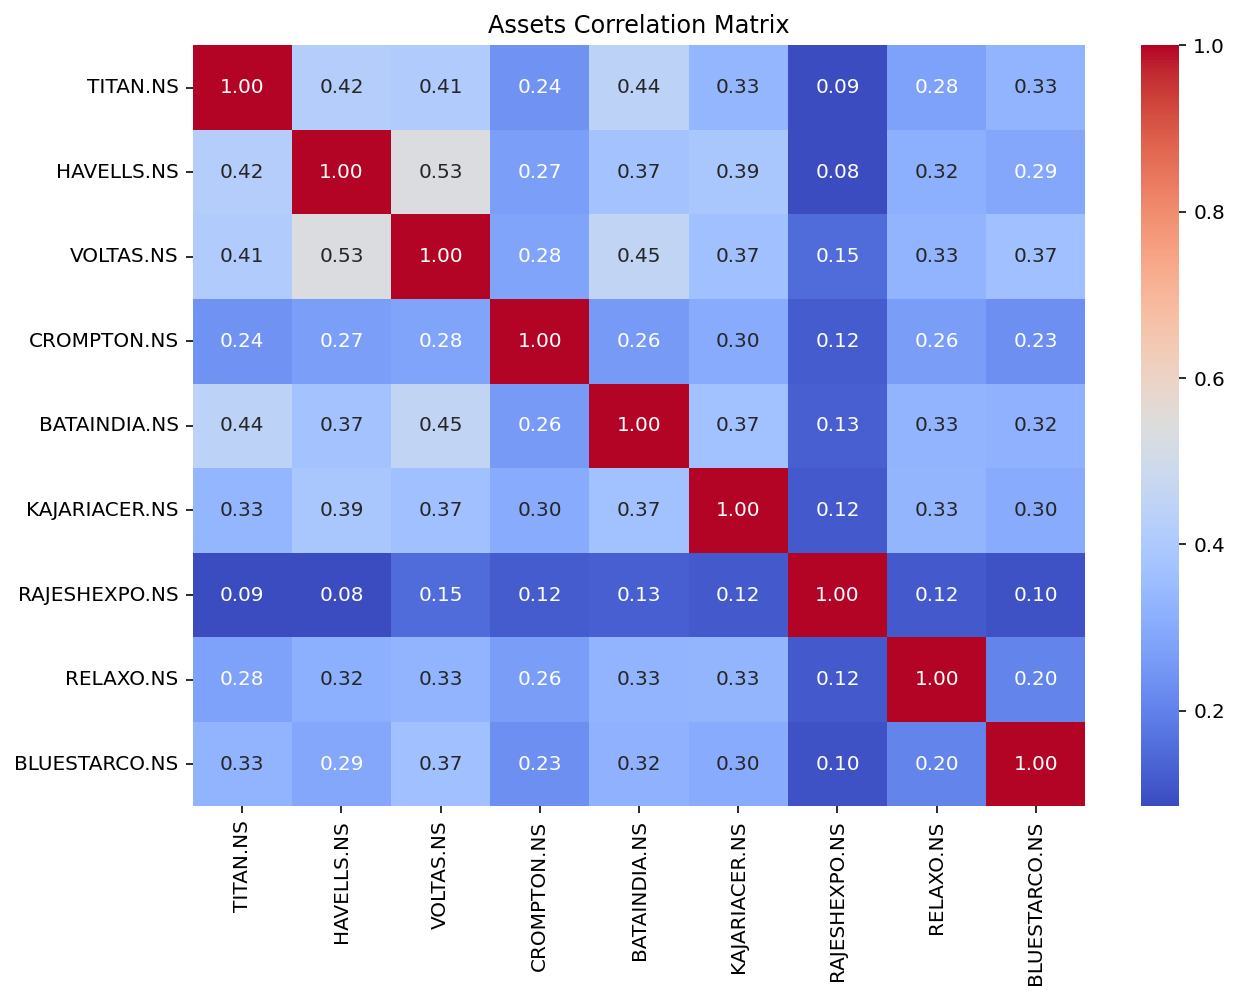

In [5]:
# Pearson correlation to get the basic idea about the relationship
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')
plt.savefig('chart1', dpi=400)

In [6]:
# function to find cointegrated pairs
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

[('VOLTAS.NS', 'CROMPTON.NS')]


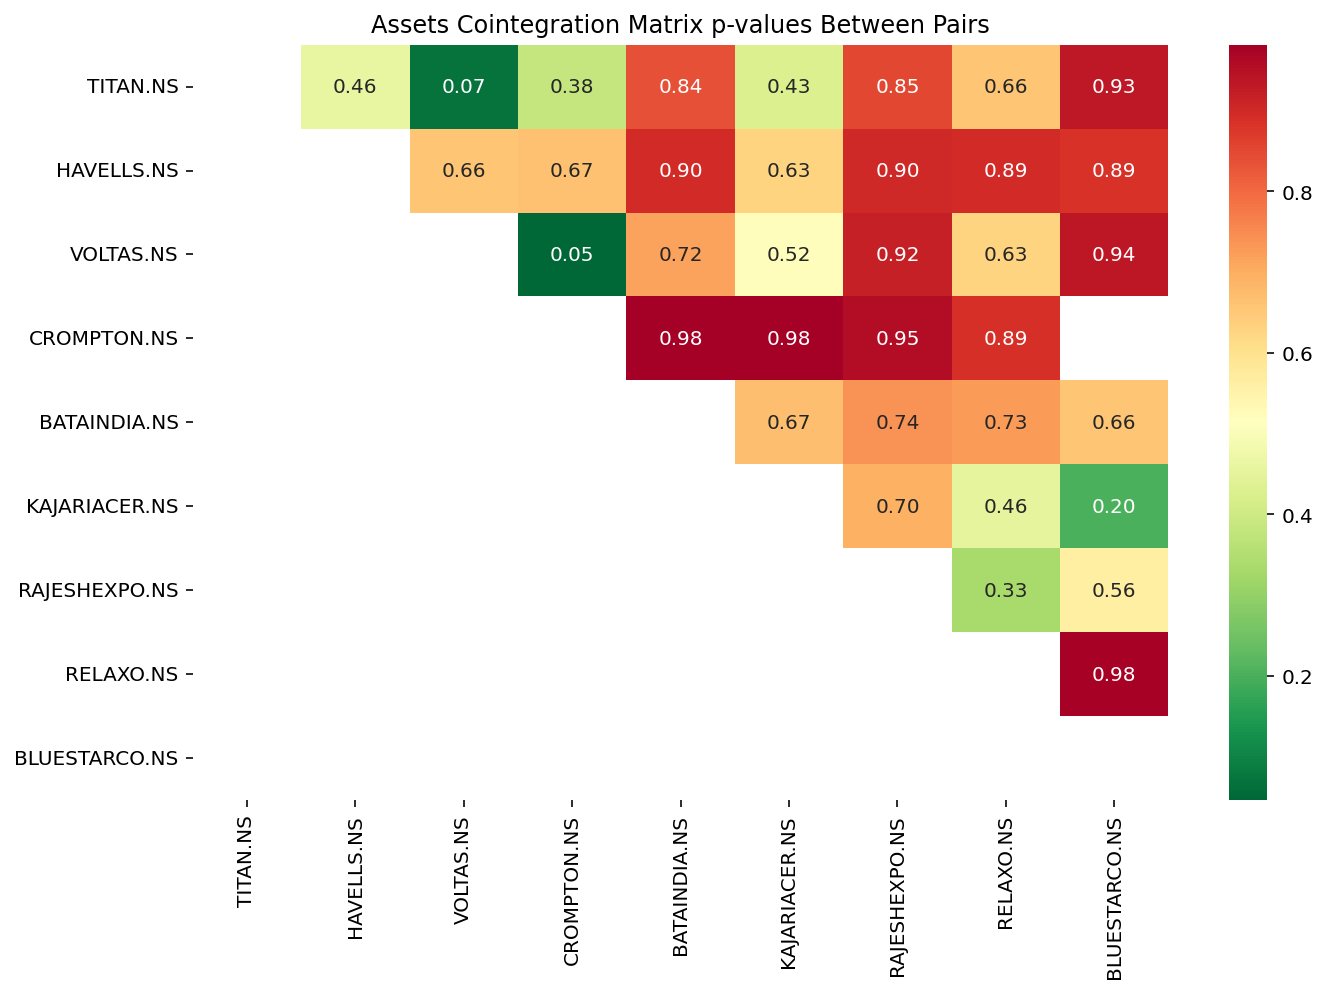

In [7]:
# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(train_close)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_close.columns,
                yticklabels = train_close.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointegration Matrix p-values Between Pairs')
plt.tight_layout()
plt.savefig('chart2', dpi=400) 

### Perform a Cointegration test for the Selected Pair

In [8]:
# final pair to test strategy
asset1 = 'KAJARIACER.NS'
asset2 = 'BLUESTARCO.NS'

In [9]:
# create a train dataframe of 2 assets
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]

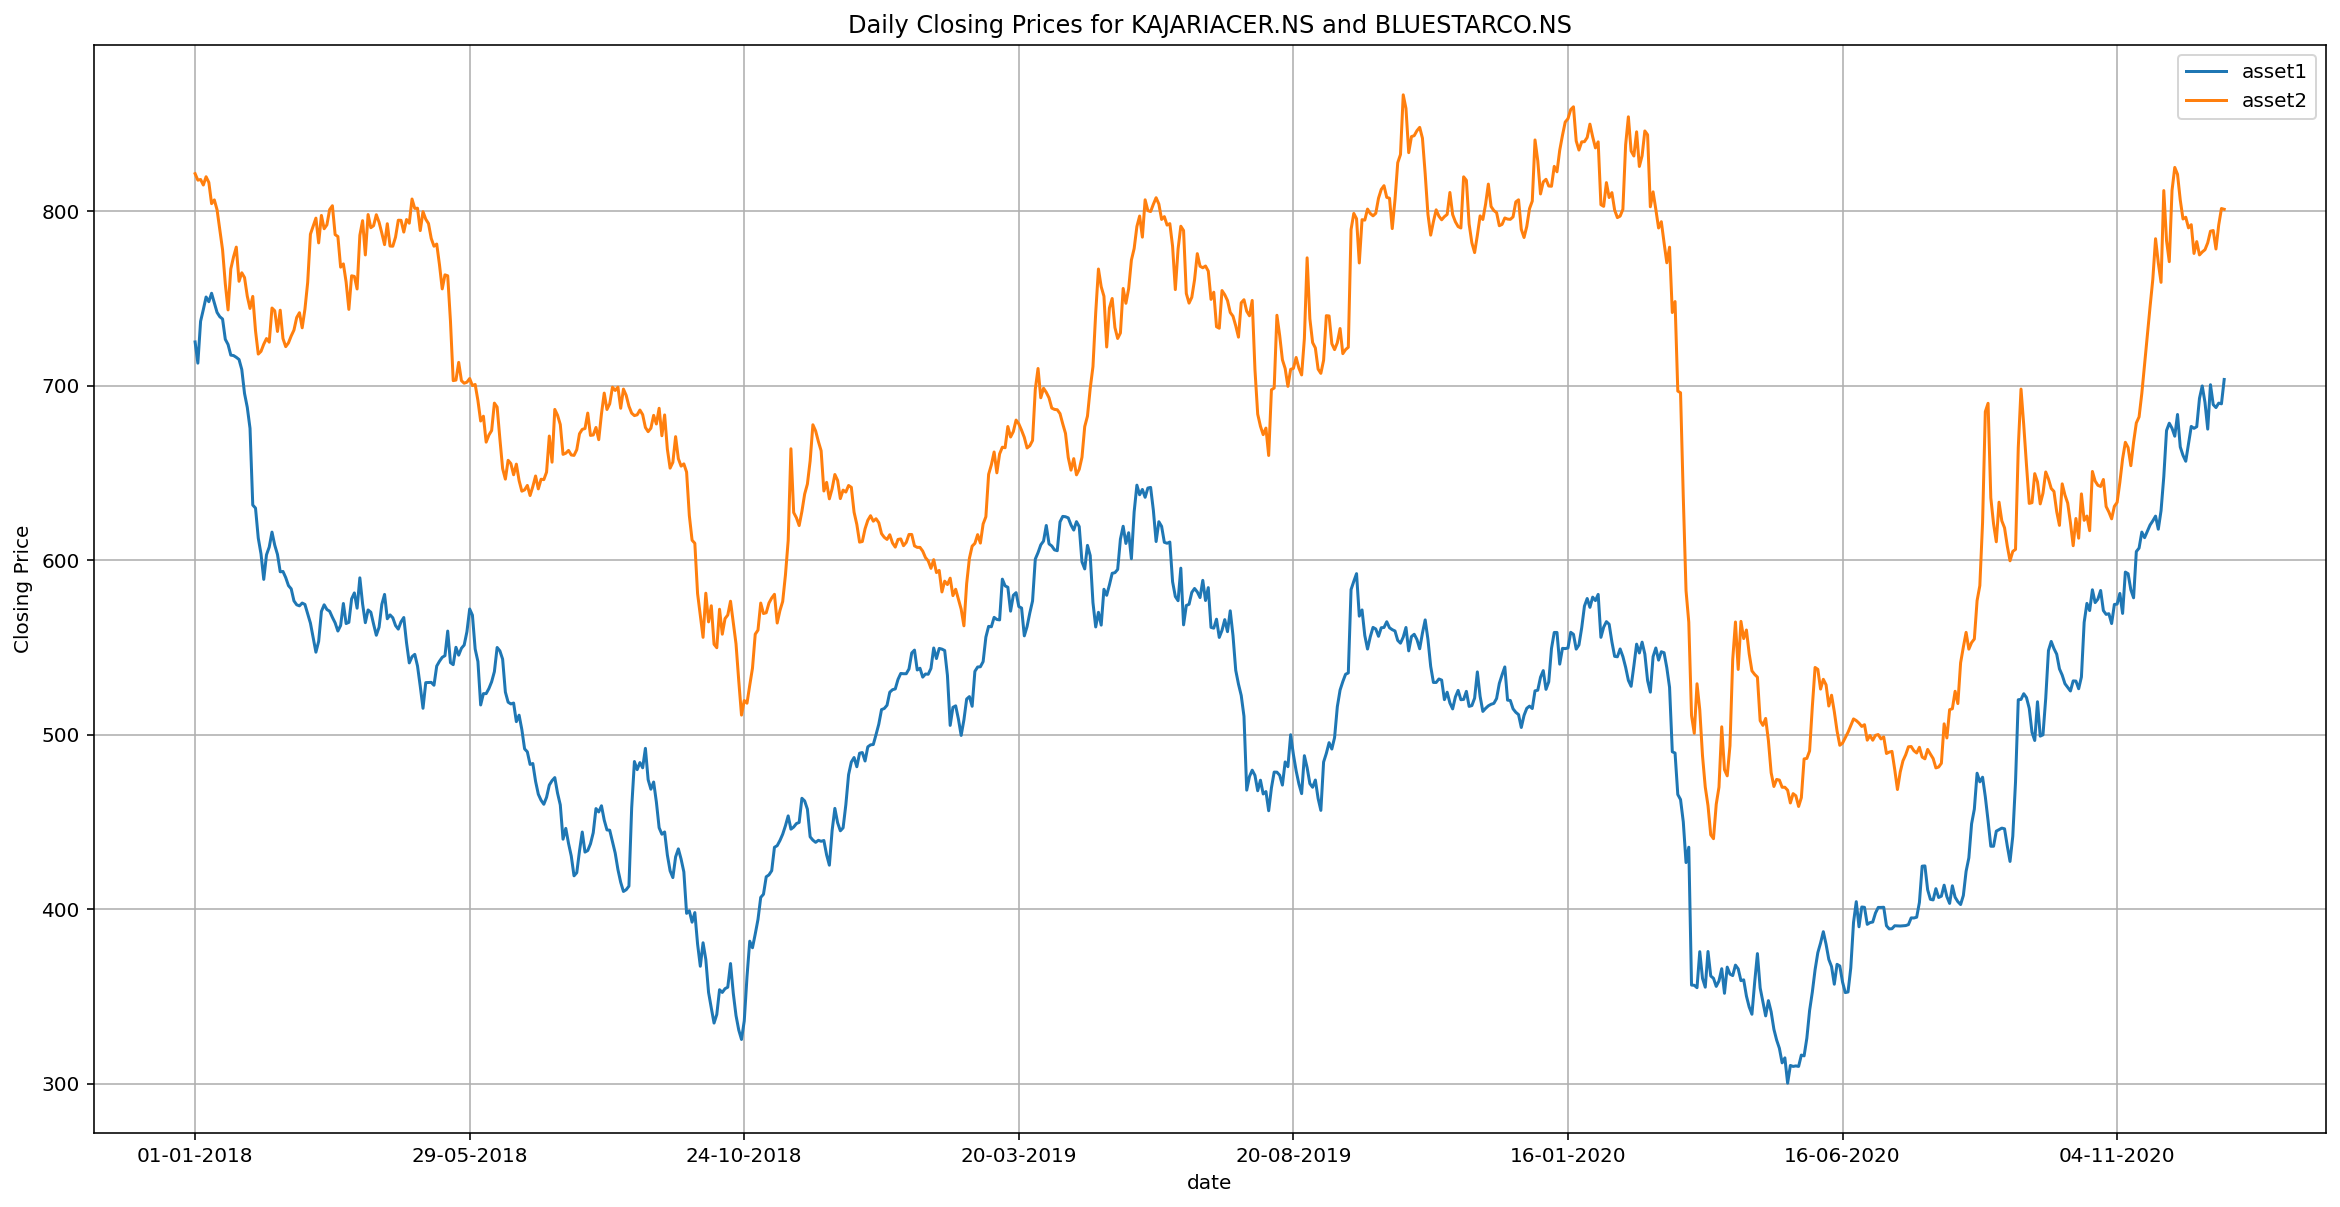

In [10]:
from matplotlib.dates import DateFormatter
# visualize closing prices
ax = train[['asset1','asset2']].plot(figsize=(20, 10), title = 'Daily Closing Prices for {} and {}'.format(asset1,asset2))
ax.set_ylabel("Closing Price")
#date_form = DateFormatter("%Y")
# ax.xaxis.set_major_formatter(date_form)
ax.grid(True);
plt.savefig('chart3', dpi=400) 

In [11]:
# run OLS regression
model=sm.OLS(train.asset2, train.asset1).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 asset2   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          5.189e+04
Date:                Mon, 21 Mar 2022   Prob (F-statistic):                        0.00
Time:                        08:13:36   Log-Likelihood:                         -4310.8
No. Observations:                 740   AIC:                                      8624.
Df Residuals:                     739   BIC:                                      8628.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
asset1         1.3190      0.006    227.786      0.000       1.308       1.330
==============================================================================
Omnibus:                       77.797   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.611
Skew:                          -0.390   Prob(JB):                     4.13e-09
Kurtosis:                       2.197   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

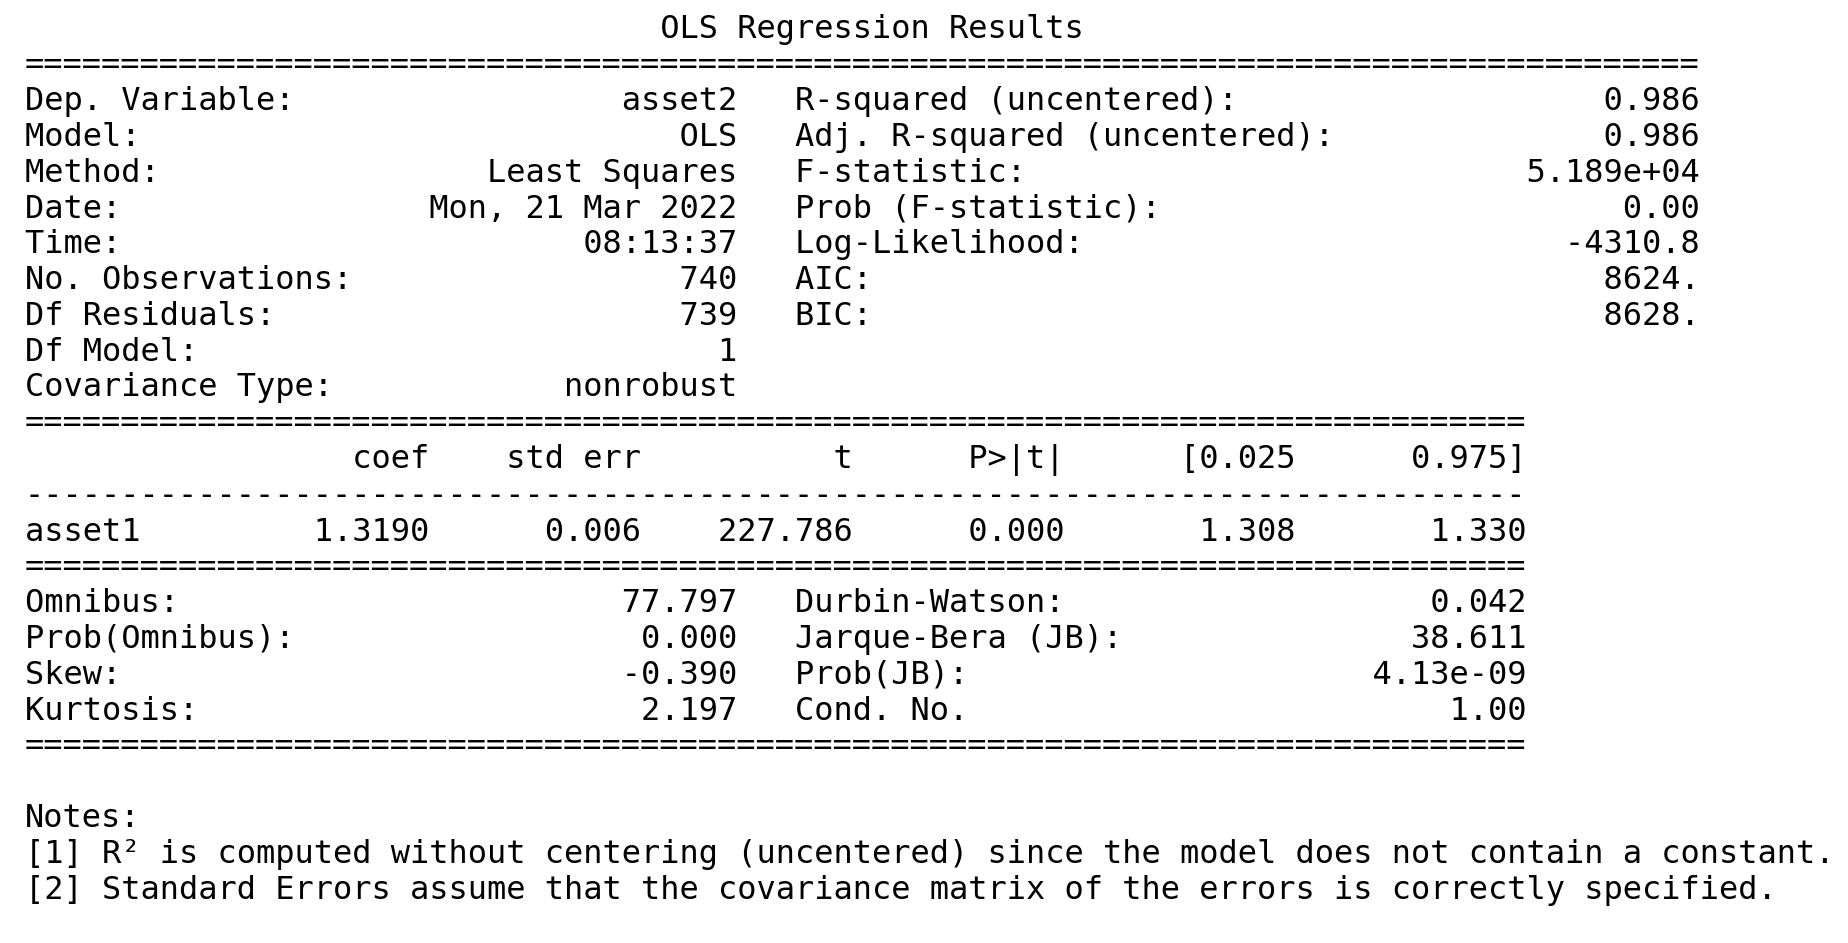

In [13]:
# print regression summary results
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)
plt.savefig('chart4', dpi=400);

In [14]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  1.3189709578207192


In [15]:
# calculate spread
spread = train.asset2 - model.params[0] * train.asset1

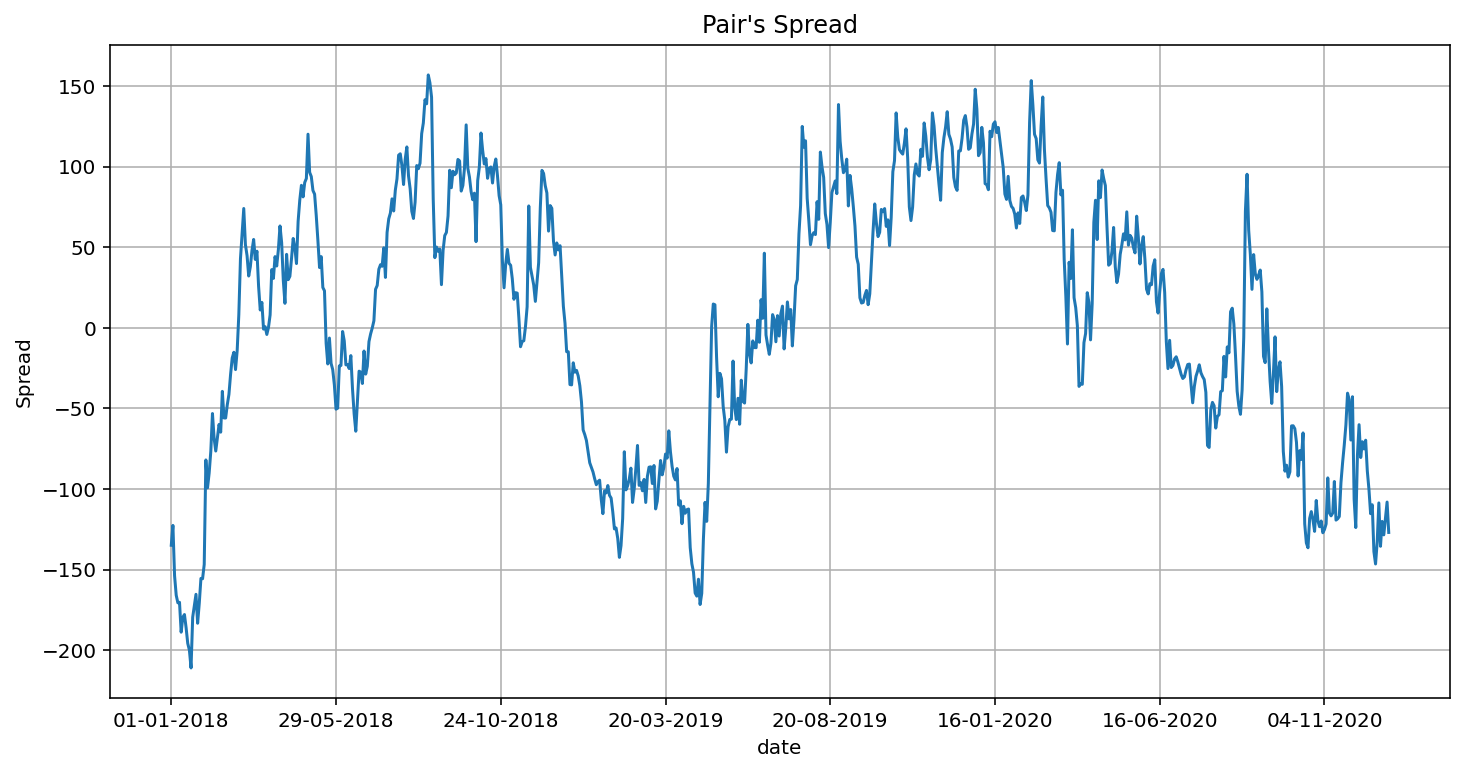

In [16]:
# Plot the spread
ax = spread.plot(figsize=(12, 6), title = "Pair's Spread")
ax.set_ylabel("Spread")
ax.grid(True);
plt.savefig('chart5', dpi=400);

In [17]:
# conduct Augmented Dickey-Fuller test
adf = adfuller(spread, maxlag = 1)
adf

(-2.8454154977228394,
 0.05207359940373161,
 0,
 739,
 {'1%': -3.439229783394421,
  '5%': -2.86545894814762,
  '10%': -2.5688568756191392},
 6257.486207373215)

In [18]:
print('Critical Value = ', adf[0])

Critical Value =  -2.8454154977228394


In [19]:
# probablity critical values
print(adf[4])

{'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


### Generate Trading Signals using z-score

In [20]:
# calculate z-score
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [21]:
# create a dataframe for trading signals
signals = pd.DataFrame()
signals['asset1'] = test_close[asset1] 
signals['asset2'] = test_close[asset2]
ratios = signals.asset1 / signals.asset2

In [22]:
signals.head()

asset1      asset2
date                              
01-01-2021  709.349976  806.650024
04-01-2021  708.250000  807.450012
05-01-2021  709.500000  817.250000
06-01-2021  710.750000  807.950012
07-01-2021  723.549988  798.000000

In [23]:
# calculate z-score and define upper and lower thresholds
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

In [24]:
signals.head()

asset1      asset2         z  z upper limit  z lower limit
date                                                                      
01-01-2021  709.349976  806.650024 -2.234712            1.0           -1.0
04-01-2021  708.250000  807.450012 -2.251252            1.0           -1.0
05-01-2021  709.500000  817.250000 -2.317818            1.0           -1.0
06-01-2021  710.750000  807.950012 -2.232358            1.0           -1.0
07-01-2021  723.549988  798.000000 -2.032344            1.0           -1.0

In [25]:
# create signal - short if z-score is greater than upper limit else long
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

In [26]:
# we take the first order difference to obtain portfolio position in that stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

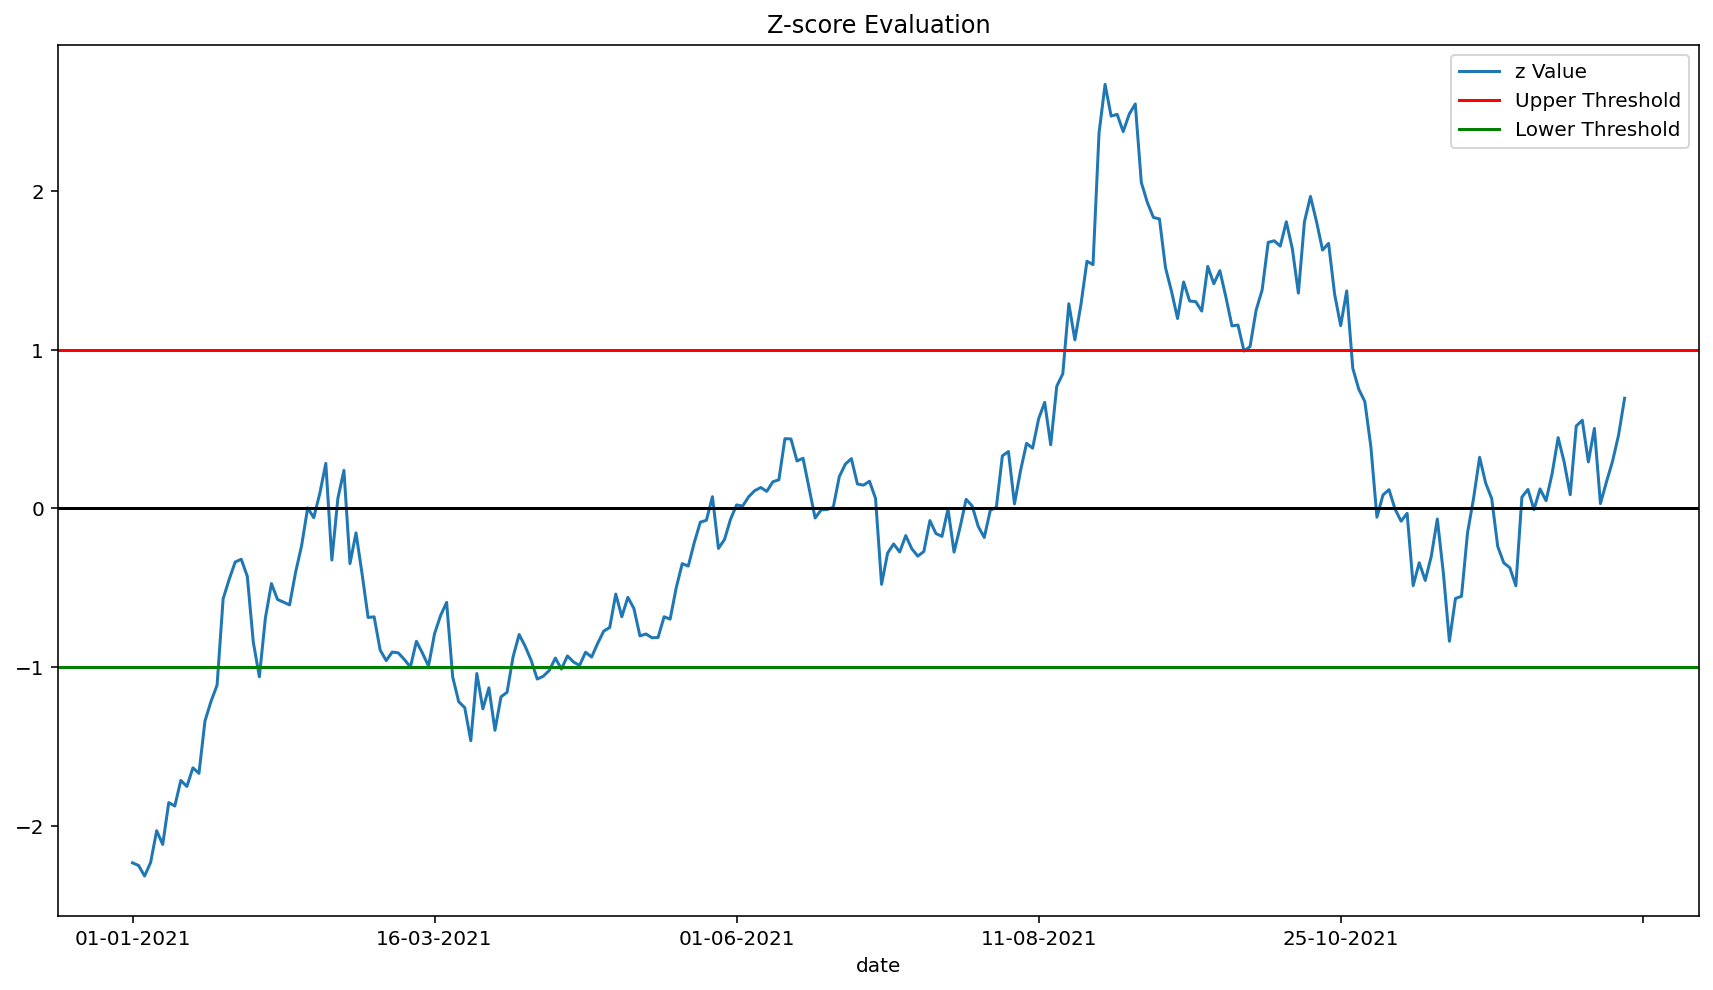

In [27]:
# # visualize z-score and upper and lower thresholds   
signals['z'].plot(label="z Value")
plt.title("Z-score Evaluation")
plt.axhline(signals['z'].mean(),color="black")
plt.axhline(signals['z upper limit'].mean(), color="red", label="Upper Threshold")
plt.axhline(signals['z lower limit'].mean(), color="green", label="Lower Threshold")
plt.legend()
plt.tight_layout()
plt.savefig('chart6', dpi=400);

In [28]:
# verify dataframe head and tail
signals.head(3).append(signals.tail(3))

asset1       asset2         z  z upper limit  z lower limit  \
date                                                                           
01-01-2021   709.349976   806.650024 -2.234712            1.0           -1.0   
04-01-2021   708.250000   807.450012 -2.251252            1.0           -1.0   
05-01-2021   709.500000   817.250000 -2.317818            1.0           -1.0   
29-12-2021  1234.099976  1010.650024  0.295881            1.0           -1.0   
30-12-2021  1284.900024  1033.349976  0.461293            1.0           -1.0   
31-12-2021  1289.949951  1011.849976  0.693911            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         1         NaN        -1         NaN  
04-01-2021         1         0.0        -1         0.0  
05-01-2021         1         0.0        -1         0.0  
29-12-2021         0         0.0         0         0.0  
30-12-2021         0         0.0         0         0.0  
31-12-2021         0         0.0         0         0.0

In [29]:
# # check portfolio position
signals[signals.signals1 != 0].head(10)

asset1      asset2         z  z upper limit  z lower limit  \
date                                                                         
01-01-2021  709.349976  806.650024 -2.234712            1.0           -1.0   
04-01-2021  708.250000  807.450012 -2.251252            1.0           -1.0   
05-01-2021  709.500000  817.250000 -2.317818            1.0           -1.0   
06-01-2021  710.750000  807.950012 -2.232358            1.0           -1.0   
07-01-2021  723.549988  798.000000 -2.032344            1.0           -1.0   
08-01-2021  726.799988  812.049988 -2.118881            1.0           -1.0   
11-01-2021  750.049988  805.950012 -1.855082            1.0           -1.0   
12-01-2021  741.400024  799.150024 -1.876596            1.0           -1.0   
13-01-2021  751.349976  791.299988 -1.715320            1.0           -1.0   
14-01-2021  743.450012  787.200012 -1.753016            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         1         NaN        -1         NaN  
04-01-2021         1         0.0        -1         0.0  
05-01-2021         1         0.0        -1         0.0  
06-01-2021         1         0.0        -1         0.0  
07-01-2021         1         0.0        -1         0.0  
08-01-2021         1         0.0        -1         0.0  
11-01-2021         1         0.0        -1         0.0  
12-01-2021         1         0.0        -1         0.0  
13-01-2021         1         0.0        -1         0.0  
14-01-2021         1         0.0        -1         0.0

In [30]:
signals[signals.positions1 != 0].head().append(signals[signals.positions1 != 0].tail())

asset1      asset2         z  z upper limit  z lower limit  \
date                                                                          
01-01-2021   709.349976  806.650024 -2.234712            1.0           -1.0   
22-01-2021   836.450012  757.599976 -0.570686            1.0           -1.0   
02-02-2021   832.599976  802.299988 -1.061762            1.0           -1.0   
03-02-2021   867.799988  797.700012 -0.690663            1.0           -1.0   
09-03-2021   975.849976  932.900024 -1.000498            1.0           -1.0   
20-04-2021   881.400024  835.049988 -0.930394            1.0           -1.0   
18-08-2021  1106.949951  816.750000  1.289814            1.0           -1.0   
30-09-2021  1197.000000  910.250000  0.991466            1.0           -1.0   
01-10-2021  1199.349976  909.400024  1.019705            1.0           -1.0   
27-10-2021  1226.349976  943.000000  0.883745            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         1         NaN        -1         NaN  
22-01-2021         0        -1.0         0         1.0  
02-02-2021         1         1.0        -1        -1.0  
03-02-2021         0        -1.0         0         1.0  
09-03-2021         1         1.0        -1        -1.0  
20-04-2021         0        -1.0         0         1.0  
18-08-2021        -1        -1.0         1         1.0  
30-09-2021         0         1.0         0        -1.0  
01-10-2021        -1        -1.0         1         1.0  
27-10-2021         0         1.0         0        -1.0

In [31]:
signals.loc[signals['positions1'] == 1].index
signals['asset1'][signals['positions1'] == 1].value_counts()

832.599976     1
975.849976     1
932.400024     1
899.000000     1
863.849976     1
1197.000000    1
1226.349976    1
Name: asset1, dtype: int64

In [32]:
signals

asset1       asset2         z  z upper limit  z lower limit  \
date                                                                           
01-01-2021   709.349976   806.650024 -2.234712            1.0           -1.0   
04-01-2021   708.250000   807.450012 -2.251252            1.0           -1.0   
05-01-2021   709.500000   817.250000 -2.317818            1.0           -1.0   
06-01-2021   710.750000   807.950012 -2.232358            1.0           -1.0   
07-01-2021   723.549988   798.000000 -2.032344            1.0           -1.0   
...                 ...          ...       ...            ...            ...   
27-12-2021  1200.050049  1012.549988  0.029882            1.0           -1.0   
28-12-2021  1219.550049  1013.200012  0.166777            1.0           -1.0   
29-12-2021  1234.099976  1010.650024  0.295881            1.0           -1.0   
30-12-2021  1284.900024  1033.349976  0.461293            1.0           -1.0   
31-12-2021  1289.949951  1011.849976  0.693911            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         1         NaN        -1         NaN  
04-01-2021         1         0.0        -1         0.0  
05-01-2021         1         0.0        -1         0.0  
06-01-2021         1         0.0        -1         0.0  
07-01-2021         1         0.0        -1         0.0  
...              ...         ...       ...         ...  
27-12-2021         0         0.0         0         0.0  
28-12-2021         0         0.0         0         0.0  
29-12-2021         0         0.0         0         0.0  
30-12-2021         0         0.0         0         0.0  
31-12-2021         0         0.0         0         0.0  

[248 rows x 9 columns]

In [33]:
signals = signals.reset_index()

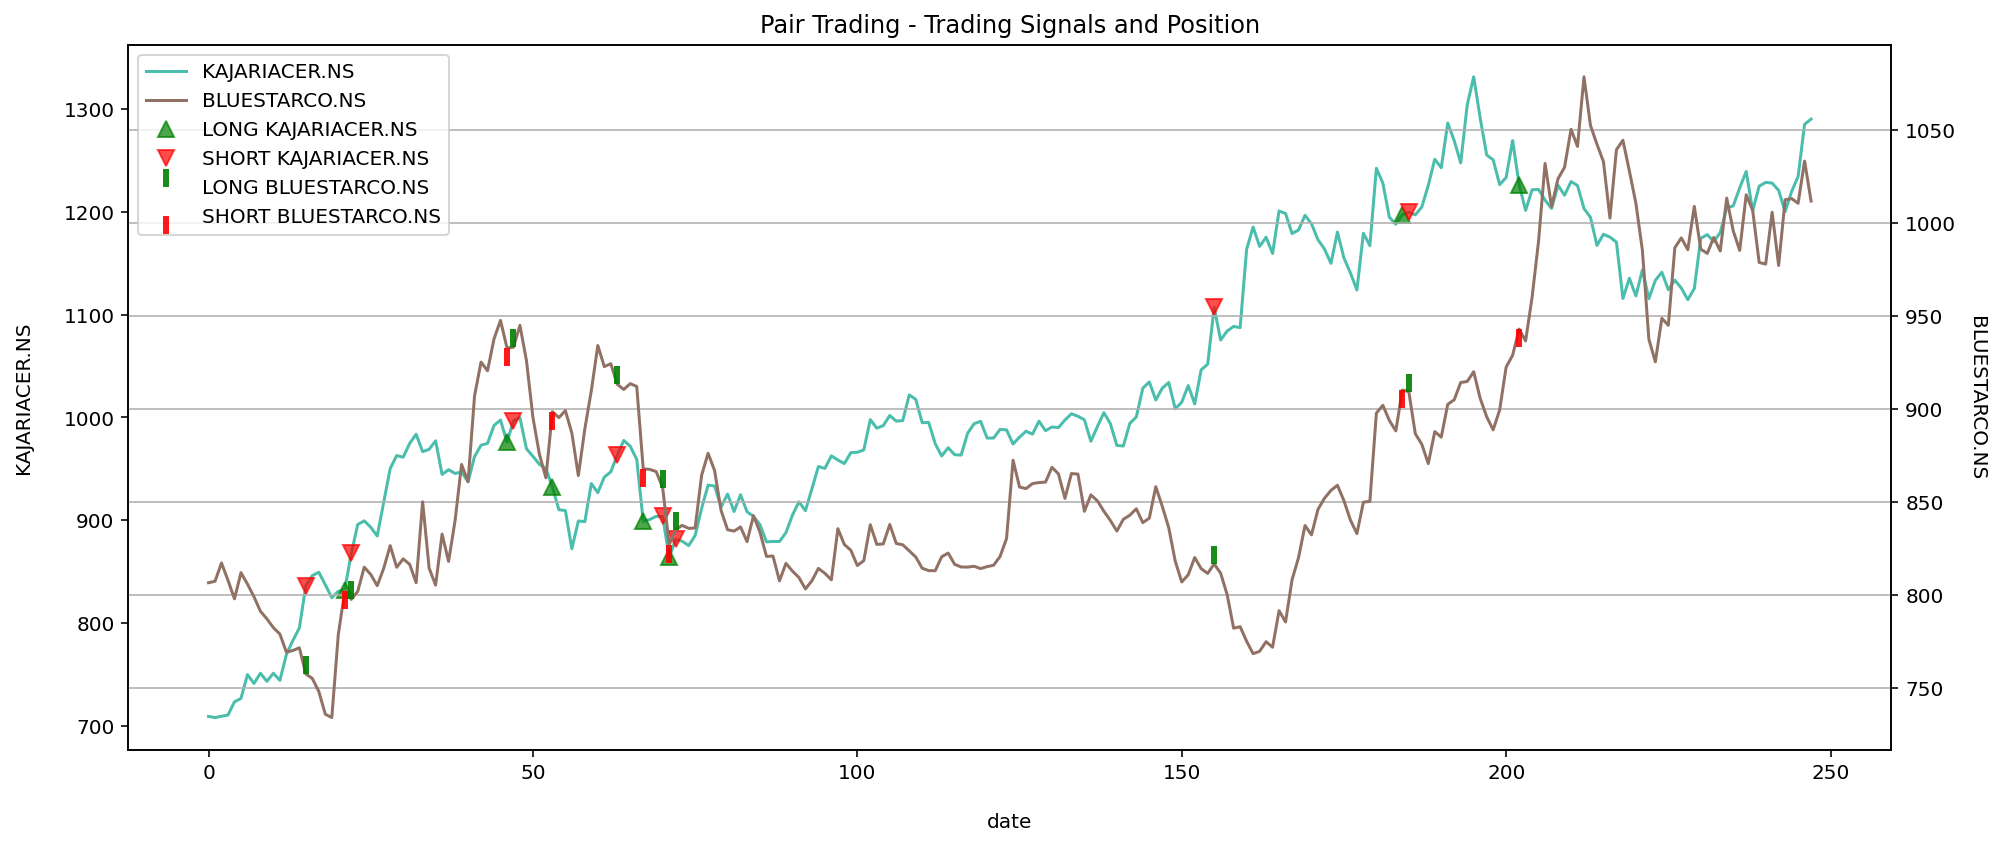

In [34]:
# visualize trading signals and position
fig=plt.figure(figsize=(14,6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()

#plot two different assets
l1, = bx.plot(signals['asset1'], c='#4abdac')
l2, = bx2.plot(signals['asset2'], c='#907163')

u1, = bx.plot(signals['asset1'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)

d1, = bx.plot(signals['asset1'][signals['positions1'] == -1], lw=0,marker='v',markersize=8, c='r',alpha=0.7)

u2, = bx2.plot(signals['asset2'][signals['positions2'] == 1], lw=0,marker=2,markersize=9, c='g',alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['asset2'][signals['positions2'] == -1], lw=0,marker=3,markersize=9, c='r',alpha=0.9,markeredgewidth=3)

bx.set_ylabel(asset1,)
bx2.set_ylabel(asset2, rotation=270)
bx.yaxis.labelpad=15
bx2.yaxis.labelpad=15
bx.set_xlabel('date')
# bx.xaxis.set_major_formatter(DateFormatter("%Y"))
# bx2.xaxis.set_major_formatter(DateFormatter("%Y"))
bx.xaxis.labelpad=15

plt.legend([l1,l2,u1,d1,u2,d2], [asset1, asset2,'LONG {}'.format(asset1),
           'SHORT {}'.format(asset1),
           'LONG {}'.format(asset2),
           'SHORT {}'.format(asset2)], loc ='best')

plt.title('Pair Trading - Trading Signals and Position')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.savefig('chart7', dpi=400);

### Portfolio Profit and Loss Calculation

In [35]:
# initial capital to calculate the actual pnl
initial_capital = 100000

# shares to buy for each position
positions1 = initial_capital// max(signals['asset1'])
positions2 = initial_capital// max(signals['asset2'])

In [36]:
# since there are two assets, we calculate each asset Pnl separately 
# and in the end we aggregate them into one portfolio
portfolio = pd.DataFrame()
portfolio['asset1'] = signals['asset1']
portfolio['holdings1'] = signals['positions1'].cumsum() * signals['asset1'] * positions1
portfolio['cash1'] = initial_capital - (signals['positions1'] * signals['asset1'] * positions1).cumsum()
portfolio['total asset1'] = portfolio['holdings1'] + portfolio['cash1']
portfolio['return1'] = portfolio['total asset1'].pct_change()
portfolio['positions1'] = signals['positions1']

In [37]:
portfolio.head().append(portfolio.tail())

asset1     holdings1          cash1   total asset1   return1  \
0     709.349976           NaN            NaN            NaN       NaN   
1     708.250000      0.000000  100000.000000  100000.000000       NaN   
2     709.500000      0.000000  100000.000000  100000.000000  0.000000   
3     710.750000      0.000000  100000.000000  100000.000000  0.000000   
4     723.549988      0.000000  100000.000000  100000.000000  0.000000   
243  1200.050049 -90003.753675  162148.751815   72144.998140  0.021938   
244  1219.550049 -91466.253675  162148.751815   70682.498140 -0.020272   
245  1234.099976 -92557.498200  162148.751815   69591.253615 -0.015439   
246  1284.900024 -96367.501800  162148.751815   65781.250015 -0.054748   
247  1289.949951 -96746.246325  162148.751815   65402.505490 -0.005758   

     positions1  
0           NaN  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
243         0.0  
244         0.0  
245         0.0  
246         0.0  
247         0.0

In [38]:
portfolio[portfolio.positions1 != 0].head()

asset1     holdings1          cash1   total asset1       return1  \
0   709.349976           NaN            NaN            NaN           NaN   
15  836.450012 -62733.750915  162733.750915  100000.000000 -1.110223e-16   
21  832.599976      0.000000  100288.752745  100288.752745 -1.232389e-03   
22  867.799988 -65084.999085  165373.751830  100288.752745 -1.110223e-16   
46  975.849976      0.000000   92185.003660   92185.003660  1.788774e-02   

    positions1  
0          NaN  
15        -1.0  
21         1.0  
22        -1.0  
46         1.0

In [39]:
# pnl for the 2nd asset
portfolio['asset2'] = signals['asset2']
portfolio['holdings2'] = signals['positions2'].cumsum() * signals['asset2'] * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['asset2'] * positions2).cumsum()
portfolio['total asset2'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total asset2'].pct_change()
portfolio['positions2'] = signals['positions2']

In [40]:
portfolio.to_csv('portfolio.csv')
portfolio.head().append(portfolio.tail())

asset1     holdings1          cash1   total asset1   return1  \
0     709.349976           NaN            NaN            NaN       NaN   
1     708.250000      0.000000  100000.000000  100000.000000       NaN   
2     709.500000      0.000000  100000.000000  100000.000000  0.000000   
3     710.750000      0.000000  100000.000000  100000.000000  0.000000   
4     723.549988      0.000000  100000.000000  100000.000000  0.000000   
243  1200.050049 -90003.753675  162148.751815   72144.998140  0.021938   
244  1219.550049 -91466.253675  162148.751815   70682.498140 -0.020272   
245  1234.099976 -92557.498200  162148.751815   69591.253615 -0.015439   
246  1284.900024 -96367.501800  162148.751815   65781.250015 -0.054748   
247  1289.949951 -96746.246325  162148.751815   65402.505490 -0.005758   

     positions1       asset2     holdings2          cash2   total asset2  \
0           NaN   806.650024           NaN            NaN            NaN   
1           0.0   807.450012      0.000000  100000.000000  100000.000000   
2           0.0   817.250000      0.000000  100000.000000  100000.000000   
3           0.0   807.950012      0.000000  100000.000000  100000.000000   
4           0.0   798.000000      0.000000  100000.000000  100000.000000   
243         0.0  1012.549988  93154.598896   41244.203367  134398.802263   
244         0.0  1013.200012  93214.401104   41244.203367  134458.604471   
245         0.0  1010.650024  92979.802208   41244.203367  134224.005575   
246         0.0  1033.349976  95068.197792   41244.203367  136312.401159   
247         0.0  1011.849976  93090.197792   41244.203367  134334.401159   

      return2  positions2  
0         NaN         NaN  
1         NaN         0.0  
2    0.000000         0.0  
3    0.000000         0.0  
4    0.000000         0.0  
243  0.024798         0.0  
244  0.000445         0.0  
245 -0.001745         0.0  
246  0.015559         0.0  
247 -0.014511         0.0

In [41]:
portfolio[portfolio.positions2 != 0].head()

asset1     holdings1          cash1   total asset1       return1  \
0   709.349976           NaN            NaN            NaN           NaN   
15  836.450012 -62733.750915  162733.750915  100000.000000 -1.110223e-16   
21  832.599976      0.000000  100288.752745  100288.752745 -1.232389e-03   
22  867.799988 -65084.999085  165373.751830  100288.752745 -1.110223e-16   
46  975.849976      0.000000   92185.003660   92185.003660  1.788774e-02   

    positions1      asset2     holdings2          cash2   total asset2  \
0          NaN  806.650024           NaN            NaN            NaN   
15        -1.0  757.599976  69699.197755   30300.802245  100000.000000   
21         1.0  802.299988      0.000000  104112.401122  104112.401122   
22        -1.0  797.700012  73388.401122   30724.000000  104112.401122   
46         1.0  932.900024      0.000000  116550.802245  116550.802245   

     return2  positions2  
0        NaN         NaN  
15  0.000000         1.0  
21  0.021299        -1.0  
22  0.000000         1.0  
46 -0.011548        -1.0

In [42]:
# total pnl and z-score
portfolio['z'] = signals['z']
portfolio['total asset'] = portfolio['total asset1'] + portfolio['total asset2']
portfolio['z upper limit'] = signals['z upper limit']
portfolio['z lower limit'] = signals['z lower limit']
portfolio = portfolio.dropna()

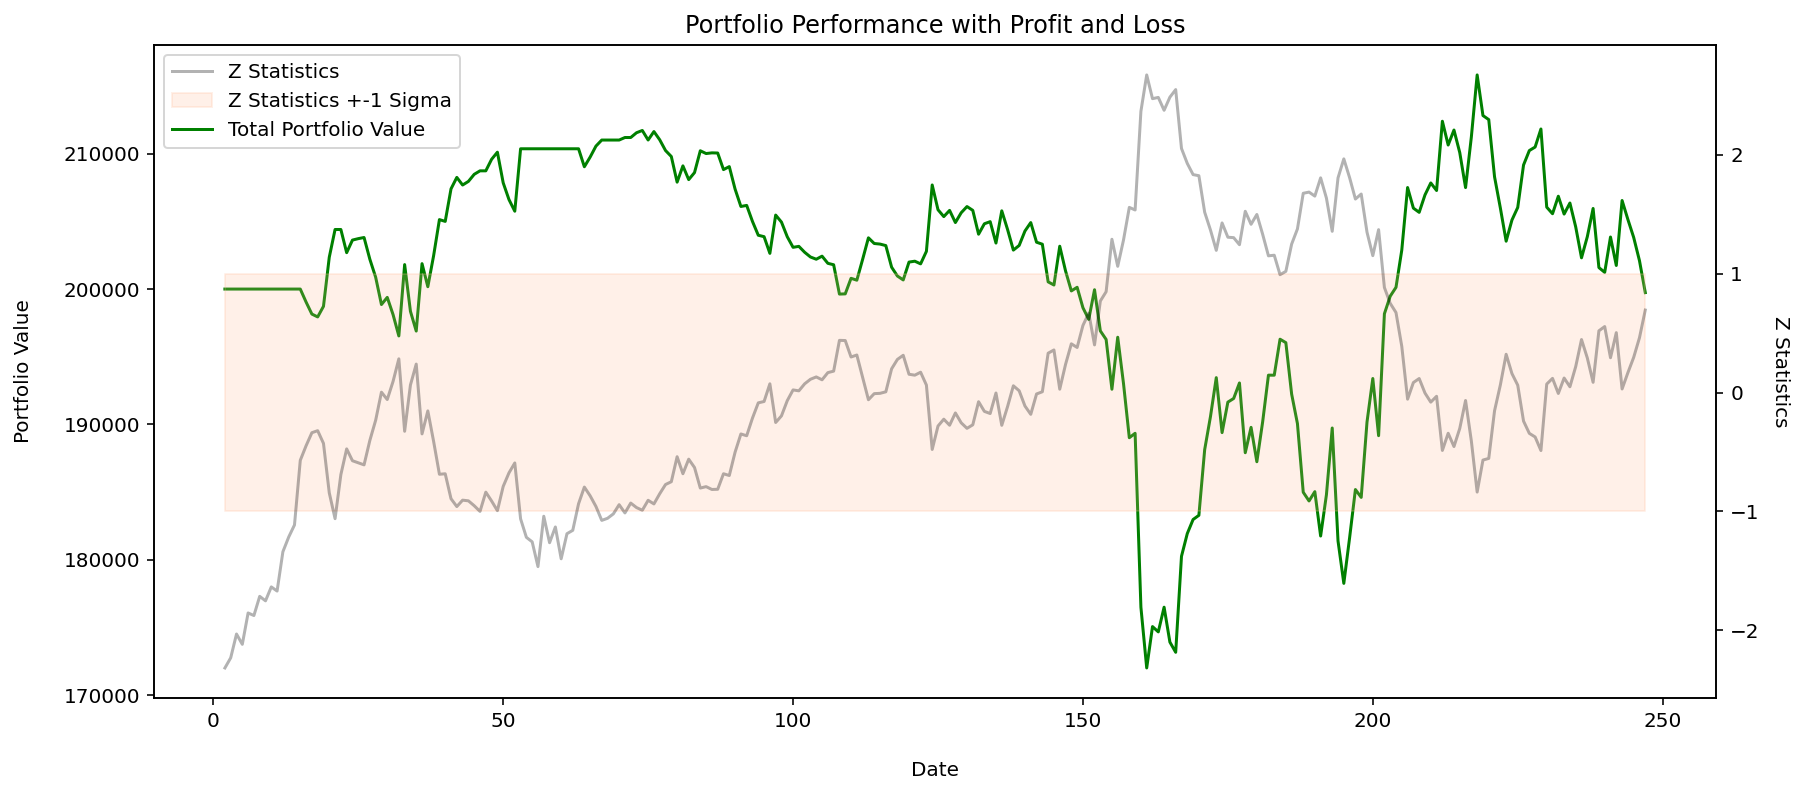

In [43]:
# plot the asset value change of the portfolio and pnl along with z-score
fig = plt.figure(figsize=(14,6),)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

l1, = ax.plot(portfolio['total asset'], c='g')
l2, = ax2.plot(portfolio['z'], c='black', alpha=0.3)

b = ax2.fill_between(portfolio.index,portfolio['z upper limit'],\
                portfolio['z lower limit'], \
                alpha=0.2,color='#ffb48f')

ax.set_ylabel('Portfolio Value')
ax2.set_ylabel('Z Statistics',rotation=270)
ax.yaxis.labelpad=15
ax2.yaxis.labelpad=15
ax.set_xlabel('Date')
ax.xaxis.labelpad=15
plt.title('Portfolio Performance with Profit and Loss')
plt.legend([l2,b,l1],['Z Statistics',
                      'Z Statistics +-1 Sigma',
                      'Total Portfolio Value'],loc='upper left');
plt.savefig('chart8', dpi=400);

In [46]:
# calculate CAGR
final_portfolio = portfolio['total asset'].iloc[-1]
final_portfolio

199736.9066492

In [47]:
profit = final_portfolio - 2*initial_capital
profit

-263.0933507999871

In [48]:
roi = (profit/(2*initial_capital))*100
roi

-0.13154667539999357

In [ ]:
# delta = (portfolio.index[-1] - portfolio.index[0]).days
delta = (portfolio.index[-1] - portfolio.index[0])
print('Number of days = ', delta)

In [45]:
YEAR_DAYS = 365
returns = (final_portfolio/initial_capital) ** (YEAR_DAYS/delta) - 1
print('CAGR = {:.3f}%' .format(returns * 100))

CAGR = 180.299%
